In [1]:
import os
import sys
import uuid
#from utils import get_value
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import pandas as pd
from io import StringIO
from datetime import datetime
import csv
import numpy as np
from time import time

# Example: Short Analysis of ReLU Module:

## List CUDA Kernels associated with ReLU

In [10]:
df = pd.read_csv('pytorch_modules_profiling.csv', sep=',', header=0)
relu_df = df.loc[(df['Module'].str.contains('ReLU') & (df['GPU'] == 'NVIDIA GeForce GTX 1650'))] # Filter Module and select a specific GPU
relu_df['kernel'].drop_duplicates().values


array(['void at::native::vectorized_elementwise_kernel<(int)4, at::native::<unnamed>::launch_clamp_scalar(at::TensorIteratorBase &, c10::Scalar, c10::Scalar, at::native::detail::ClampLimits)::[lambda() (instance 1)]::operator ()() const::[lambda() (instance 7)]::operator ()() const::[lambda(float) (instance 1)], at::detail::Array<char *, (int)2>>(int, T2, T3)'],
      dtype=object)

## Plot the Execution time with respect to size of data

Text(0.5, 1.0, 'Execution Time vs Data Size')

<Figure size 640x480 with 0 Axes>

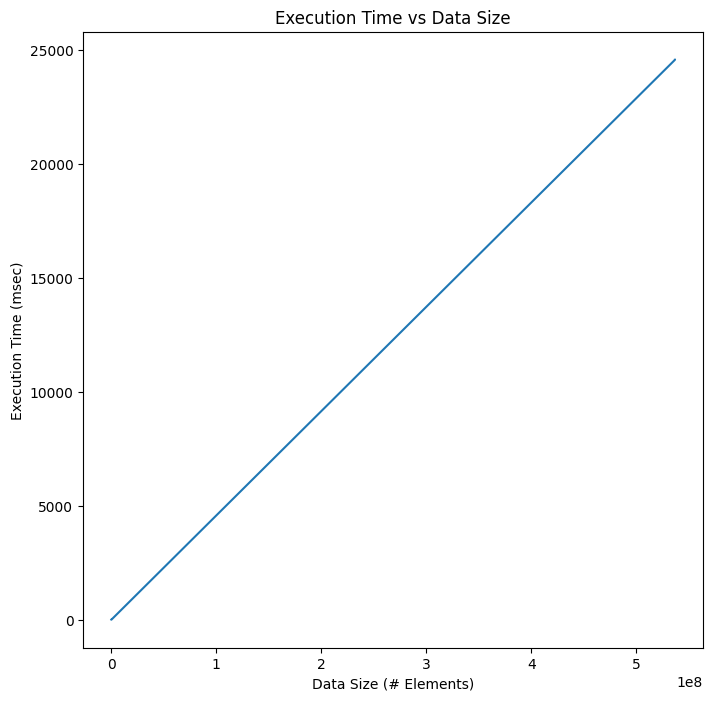

In [18]:
# Size of Data = (Batch Size x Data size), Execution time key = Duration
X, Y = relu_df['Batch Size'] * relu_df['Data size'], relu_df['Duration'] / 1000
X,Y = zip(*sorted(zip(X,Y)))
fig = plt.figure(0)
plt.subplots(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel('Data Size (# Elements)')
plt.ylabel('Execution Time (msec)')
plt.title('Execution Time vs Data Size')

## Plot Occupancy with respect to size of data

Text(0.5, 1.0, 'SM Occupancy vs Data Size')

<Figure size 640x480 with 0 Axes>

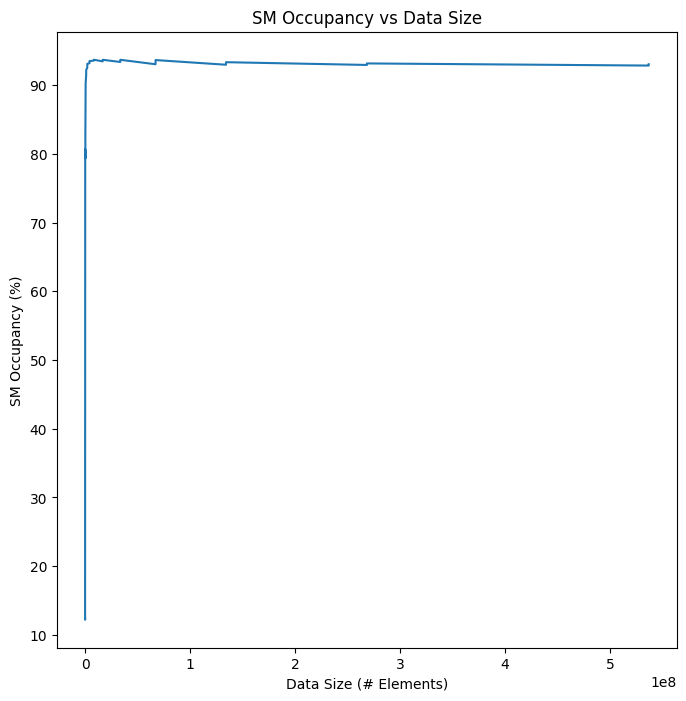

In [17]:
# Size of Data = (Batch Size x Data size), Occupancy key = Achieved Occupancy
X, Y = relu_df['Batch Size'] * relu_df['Data size'], relu_df['Achieved Occupancy']
X,Y = zip(*sorted(zip(X,Y)))
fig = plt.figure(0)
plt.subplots(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel('Data Size (# Elements)')
plt.ylabel('SM Occupancy (%)')
plt.title('SM Occupancy vs Data Size')

## Plot Occupancy with respect to total number of threads

Text(0.5, 1.0, 'SM Occupancy vs Data Size')

<Figure size 640x480 with 0 Axes>

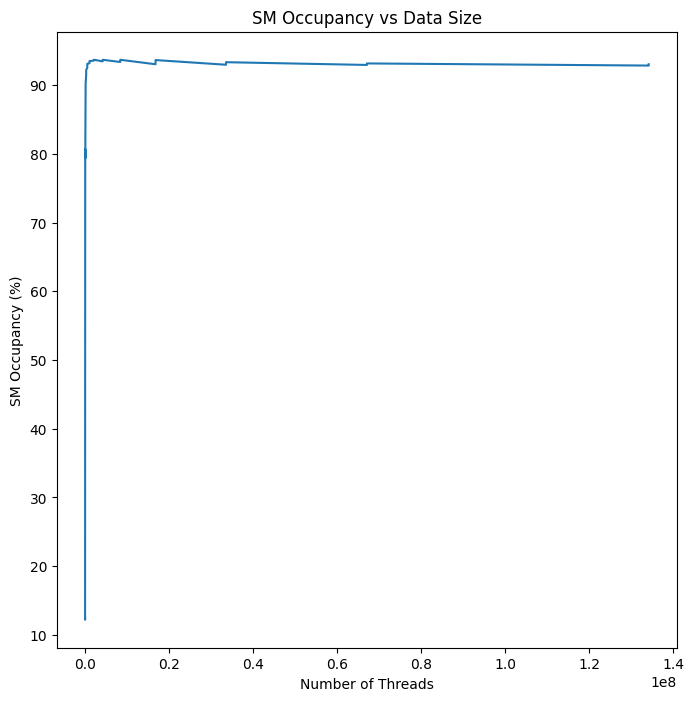

In [19]:
# Number of threads = (Block Size x Grid Size), Occupancy key = Achieved Occupancy
X, Y = relu_df['Block Size'] * relu_df['Grid Size'], relu_df['Achieved Occupancy']
X,Y = zip(*sorted(zip(X,Y)))
fig = plt.figure(0)
plt.subplots(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel('Number of Threads')
plt.ylabel('SM Occupancy (%)')
plt.title('SM Occupancy vs Data Size')

In [23]:
for idx,m in enumerate(relu_df.columns.values):
    if idx == 0:
        print(f"|{m}|",end='')
    else:
        print(f"{m}|",end='')
print('')
for idx in range(0,len(relu_df.columns.values)):
    if idx == 0:
        print(f"| ------------- |",end='')
    else:
        print(f":-------------:|",end='')

|GPU|Module|Batch Size|Data size|kernel|Duration|Memory Throughput|DRAM Throughput|L1/TEX Cache Throughput|L2 Cache Throughput|Compute (SM) Throughput|Block Size|Grid Size|Waves Per SM|Achieved Occupancy|Registers Per Thread|Shared Memory Configuration Size|Driver Shared Memory Per Block|Dynamic Shared Memory Per Block|Static Shared Memory Per Block|


TypeError: 'int' object is not iterable